# Data Series Analysis of USDBRL and USDCNH

The data for the two series comes from the FRED database. After retrieving the data for the last 3 years, we merge it into one single dataframe and compute the log returns. 
Then, we plot the two series with scatter plot and draw the linear regression and write the equation to see if there 
is explanatory power into on currency or the other.
Finally we compute the Beta of the two currencies to see the hedge ratio in case of a pair trade.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
style.use('ggplot')

In [2]:
start = dt.datetime(2018,1,4)
end = dt.datetime(2020,12,31)

Import data from FRED

In [3]:
df1 = web.DataReader('DEXBZUS', 'fred', start, end)
df2 = web.DataReader('DEXCHUS', 'fred', start, end)

Save the series into two csv files

In [4]:
df1.to_csv('DEXBZUS.csv')
df2.to_csv('DEXCHUS.csv')

Open the series from the csv and merge them into one dataframe

In [5]:
df1 = pd.read_csv('DEXBZUS.csv', parse_dates=True, index_col=0)
df2 = pd.read_csv('DEXCHUS.csv', parse_dates=True, index_col=0)
df = pd.merge(df1, df2, on='DATE', how='outer')

            DEXBZUS  DEXCHUS
DATE                        
2018-01-04   3.2274   6.4915
2018-01-05   3.2285   6.4875
2018-01-08   3.2308   6.4970
2018-01-09   3.2491   6.5263
2018-01-10   3.2363   6.5055


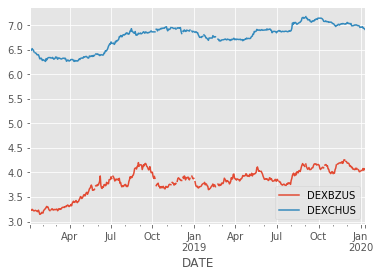

In [6]:
print(df.head())
df.plot()

Compute Log returns and save them into a new column or % points 

In [7]:
df['BZUS_RET'] = np.log(df['DEXBZUS'] / df['DEXBZUS'].shift(1))
df['CHUS_RET'] = np.log(df['DEXCHUS'] / df['DEXCHUS'].shift(1))
# df['CHUS_RET'] = df['DEXCHUS'].pct_change()

In [8]:
df.fillna(0)
#df.isna().sum()

,DEXBZUS,DEXCHUS,BZUS_RET,CHUS_RET
DATE,,,,
2018-01-04,3.2274,6.4915,0.000000,0.000000
2018-01-05,3.2285,6.4875,0.000341,-0.000616
2018-01-08,3.2308,6.4970,0.000712,0.001463
2018-01-09,3.2491,6.5263,0.005648,0.004500
2018-01-10,3.2363,6.5055,-0.003947,-0.003192
...,...,...,...,...
2020-01-06,4.0548,6.9749,0.004201,0.001435
2020-01-07,4.0813,6.9443,0.006514,-0.004397
2020-01-08,4.0463,6.9447,-0.008613,0.000058


Let's see what the two series look like

In [9]:
df['BZUS_RET'].describe()

count    479.000000
mean       0.000326
std        0.008162
min       -0.048626
25%       -0.004588
50%        0.000467
75%        0.005425
max        0.028812
Name: BZUS_RET, dtype: float64

In [10]:
df['CHUS_RET'].describe()

count    479.000000
mean       0.000097
std        0.002745
min       -0.010986
25%       -0.001354
50%        0.000000
75%        0.001464
max        0.015644
Name: CHUS_RET, dtype: float64

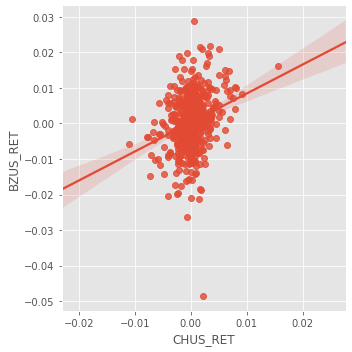

In [11]:
sns.lmplot(x='CHUS_RET',y='BZUS_RET',data=df)
fit_reg=True
hue='index'

Then we do a linear regression and print results

In [12]:
import statsmodels.formula.api as sm
result = sm.ols(formula='BZUS_RET ~ CHUS_RET', data=df).fit()
print(result.params)
print(result.summary())

#R sq. of 0.075 means there is no explanatory power into the linear regression

Intercept    0.000246
CHUS_RET     0.815873
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               BZUS_RET   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     38.82
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.02e-09
Time:                        19:19:38   Log-Likelihood:                 1642.7
No. Observations:                 479   AIC:                            -3281.
Df Residuals:                     477   BIC:                            -3273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [13]:
#We can also compute Beta as ( Std1 * Corr12) / Std2 and get the same result as in the regression

( df['BZUS_RET'].std() * df['BZUS_RET'].corr(df['CHUS_RET']) ) / df['CHUS_RET'].std()

0.8158731550297673

The final equation will look like this:

BZUS_RET = 0.816*CHUS_RET + 0.0002